In [1]:
# !pip install wordcloud
# !pip install multidict

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [3]:
# Create wordcloud image for every words
fields = ['word',"total"]
## CHANGE FILE NAME!!!
text_all = pd.read_csv('femaleFigureSkater_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['total']

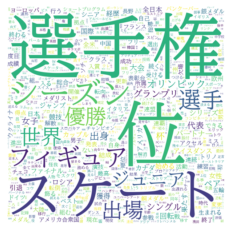

In [4]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_femaleFigureSkater_all.png")


In [5]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleFigureSkaterAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [6]:
# create wc for noun(名詞)
df = pd.read_csv('femaleFigureSkater_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,total,articles
0,選手権,7549,1539
1,位,7368,1050
2,スケート,5824,2488
3,シーズン,5005,903
4,フィギュア,4248,2466


In [7]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941 entries, 0 to 9381
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      7941 non-null   object
 1   total     7941 non-null   int64 
 2   articles  7941 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 248.2+ KB


In [8]:
noun_dict = noun2.set_index("word").to_dict()['total']

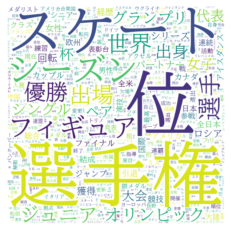

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_femaleFigureSkater_noun.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleFigureSkaterNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [11]:
# verb (動詞)
df = pd.read_csv('femaleFigureSkater_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,total,articles
26,果たす,960,511
36,始める,767,617
47,終わる,574,339
51,入る,536,291
57,生まれる,433,420


In [12]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 26 to 9369
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      1290 non-null   object
 1   total     1290 non-null   int64 
 2   articles  1290 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.3+ KB


In [13]:
verb_dict = verb2.set_index("word").to_dict()['total']

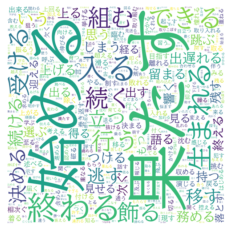

In [14]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_femaleFigureSkater_verb.png")

In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleFigureSkaterVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [16]:
# adj (形容詞)
df = pd.read_csv('femaleFigureSkater_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,total,articles
82,ない,326,206
158,高い,164,67
227,大きい,116,87
315,多い,73,48
369,無い,60,53


In [17]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 82 to 9301
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      151 non-null    object
 1   total     151 non-null    int64 
 2   articles  151 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


In [18]:
adj_dict = adj2.set_index("word").to_dict()['total']

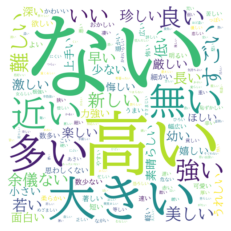

In [19]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600)

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_femaleFigureSkater_adj.png")

In [20]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleFigureSkaterAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)